In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array

In [2]:
SIZE=256
np.random.seed(42)

In [3]:
img_data=[]

img = cv2.imread('cox_logo.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (SIZE,SIZE))

img_data_bw=[]

img_bw = cv2.imread('cox_logo_old.jpg',1)
img_bw = cv2.cvtColor(img_bw,cv2.COLOR_BGR2RGB)
img_bw = cv2.resize(img_bw, (SIZE,SIZE))


In [4]:
img_data.append(img_to_array(img))
img_array = np.reshape(img_data,(len(img_data),SIZE,SIZE,3))

img_data_bw.append(img_to_array(img_bw))
img_array_bw = np.reshape(img_data_bw,(len(img_data_bw),SIZE,SIZE,3))

In [5]:
img_array = img_array.astype('float32')/255.
img_array_bw = img_array_bw.astype('float32')/255.

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3), activation='relu', padding='same'))


In [7]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [8]:
model.fit(img_array,img_array,epochs=1000,shuffle=True)

Epoch 1/1000
1/1 [==============================] - 1s 855ms/step - loss: 0.6614 - accuracy: 0.2002
Epoch 2/1000
1/1 [==============================] - 0s 131ms/step - loss: 0.5519 - accuracy: 0.2010
Epoch 3/1000
1/1 [==============================] - 0s 146ms/step - loss: 0.4064 - accuracy: 0.2008
Epoch 4/1000
1/1 [==============================] - 0s 144ms/step - loss: 0.2400 - accuracy: 0.2000
Epoch 5/1000
1/1 [==============================] - 0s 150ms/step - loss: 0.1347 - accuracy: 0.2074
Epoch 6/1000
1/1 [==============================] - 0s 150ms/step - loss: 0.2599 - accuracy: 0.2180
Epoch 7/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.2326 - accuracy: 0.2172
Epoch 8/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.1486 - accuracy: 0.2152
Epoch 9/1000
1/1 [==============================] - 0s 122ms/step - loss: 0.1165 - accuracy: 0.2110
Epoch 10/1000
1/1 [==============================] - 0s 145ms/step - loss: 0.1261 - accuracy: 0.2089

1/1 [==============================] - 0s 176ms/step - loss: 0.0310 - accuracy: 0.3688
Epoch 83/1000
1/1 [==============================] - 0s 155ms/step - loss: 0.0303 - accuracy: 0.3919
Epoch 84/1000
1/1 [==============================] - 0s 144ms/step - loss: 0.0297 - accuracy: 0.4114
Epoch 85/1000
1/1 [==============================] - 0s 160ms/step - loss: 0.0292 - accuracy: 0.4318
Epoch 86/1000
1/1 [==============================] - 0s 173ms/step - loss: 0.0289 - accuracy: 0.4647
Epoch 87/1000
1/1 [==============================] - 0s 183ms/step - loss: 0.0285 - accuracy: 0.4862
Epoch 88/1000
1/1 [==============================] - 0s 158ms/step - loss: 0.0282 - accuracy: 0.4975
Epoch 89/1000
1/1 [==============================] - 0s 148ms/step - loss: 0.0279 - accuracy: 0.5014
Epoch 90/1000
1/1 [==============================] - 0s 158ms/step - loss: 0.0276 - accuracy: 0.5001
Epoch 91/1000
1/1 [==============================] - 0s 139ms/step - loss: 0.0272 - accuracy: 0.4944
Epoc

1/1 [==============================] - 0s 140ms/step - loss: 0.0118 - accuracy: 0.6344
Epoch 163/1000
1/1 [==============================] - 0s 136ms/step - loss: 0.0118 - accuracy: 0.6417
Epoch 164/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.0117 - accuracy: 0.6468
Epoch 165/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.0116 - accuracy: 0.6475
Epoch 166/1000
1/1 [==============================] - 0s 131ms/step - loss: 0.0116 - accuracy: 0.6521
Epoch 167/1000
1/1 [==============================] - 0s 139ms/step - loss: 0.0115 - accuracy: 0.6571
Epoch 168/1000
1/1 [==============================] - 0s 113ms/step - loss: 0.0115 - accuracy: 0.6552
Epoch 169/1000
1/1 [==============================] - 0s 125ms/step - loss: 0.0114 - accuracy: 0.6552
Epoch 170/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.0114 - accuracy: 0.6591
Epoch 171/1000
1/1 [==============================] - 0s 128ms/step - loss: 0.0113 - accuracy: 0.

1/1 [==============================] - 0s 122ms/step - loss: 0.0090 - accuracy: 0.6822
Epoch 243/1000
1/1 [==============================] - 0s 116ms/step - loss: 0.0090 - accuracy: 0.6817
Epoch 244/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.0090 - accuracy: 0.6620
Epoch 245/1000
1/1 [==============================] - 0s 148ms/step - loss: 0.0090 - accuracy: 0.6905
Epoch 246/1000
1/1 [==============================] - 0s 129ms/step - loss: 0.0089 - accuracy: 0.6603
Epoch 247/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0089 - accuracy: 0.6826
Epoch 248/1000
1/1 [==============================] - 0s 128ms/step - loss: 0.0089 - accuracy: 0.6746
Epoch 249/1000
1/1 [==============================] - 0s 140ms/step - loss: 0.0089 - accuracy: 0.6693
Epoch 250/1000
1/1 [==============================] - 0s 137ms/step - loss: 0.0089 - accuracy: 0.6882
Epoch 251/1000
1/1 [==============================] - 0s 127ms/step - loss: 0.0089 - accuracy: 0.

1/1 [==============================] - 0s 136ms/step - loss: 0.0077 - accuracy: 0.6669
Epoch 323/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0077 - accuracy: 0.6972
Epoch 324/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.0077 - accuracy: 0.6701
Epoch 325/1000
1/1 [==============================] - 0s 136ms/step - loss: 0.0077 - accuracy: 0.6905
Epoch 326/1000
1/1 [==============================] - 0s 129ms/step - loss: 0.0077 - accuracy: 0.6590
Epoch 327/1000
1/1 [==============================] - 0s 134ms/step - loss: 0.0077 - accuracy: 0.7196
Epoch 328/1000
1/1 [==============================] - 0s 125ms/step - loss: 0.0078 - accuracy: 0.6223
Epoch 329/1000
1/1 [==============================] - 0s 127ms/step - loss: 0.0080 - accuracy: 0.7647
Epoch 330/1000
1/1 [==============================] - 0s 121ms/step - loss: 0.0083 - accuracy: 0.5757
Epoch 331/1000
1/1 [==============================] - 0s 142ms/step - loss: 0.0088 - accuracy: 0.

1/1 [==============================] - 0s 123ms/step - loss: 0.0065 - accuracy: 0.6793
Epoch 403/1000
1/1 [==============================] - 0s 137ms/step - loss: 0.0064 - accuracy: 0.6820
Epoch 404/1000
1/1 [==============================] - 0s 136ms/step - loss: 0.0064 - accuracy: 0.6845
Epoch 405/1000
1/1 [==============================] - 0s 118ms/step - loss: 0.0064 - accuracy: 0.6694
Epoch 406/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.0064 - accuracy: 0.6902
Epoch 407/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.0064 - accuracy: 0.6697
Epoch 408/1000
1/1 [==============================] - 0s 149ms/step - loss: 0.0064 - accuracy: 0.6959
Epoch 409/1000
1/1 [==============================] - 0s 131ms/step - loss: 0.0064 - accuracy: 0.6559
Epoch 410/1000
1/1 [==============================] - 0s 151ms/step - loss: 0.0065 - accuracy: 0.7199
Epoch 411/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.0066 - accuracy: 0.

1/1 [==============================] - 0s 138ms/step - loss: 0.0057 - accuracy: 0.6806
Epoch 483/1000
1/1 [==============================] - 0s 121ms/step - loss: 0.0057 - accuracy: 0.6738
Epoch 484/1000
1/1 [==============================] - 0s 128ms/step - loss: 0.0057 - accuracy: 0.6880
Epoch 485/1000
1/1 [==============================] - 0s 156ms/step - loss: 0.0056 - accuracy: 0.6805
Epoch 486/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.0056 - accuracy: 0.6712
Epoch 487/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.0056 - accuracy: 0.6888
Epoch 488/1000
1/1 [==============================] - 0s 148ms/step - loss: 0.0056 - accuracy: 0.6748
Epoch 489/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.0056 - accuracy: 0.6808
Epoch 490/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.0056 - accuracy: 0.6786
Epoch 491/1000
1/1 [==============================] - 0s 129ms/step - loss: 0.0056 - accuracy: 0.

1/1 [==============================] - 0s 140ms/step - loss: 0.0053 - accuracy: 0.7170
Epoch 563/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.0053 - accuracy: 0.6405
Epoch 564/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.0054 - accuracy: 0.7160
Epoch 565/1000
1/1 [==============================] - 0s 128ms/step - loss: 0.0053 - accuracy: 0.6258
Epoch 566/1000
1/1 [==============================] - 0s 146ms/step - loss: 0.0053 - accuracy: 0.7184
Epoch 567/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0053 - accuracy: 0.6318
Epoch 568/1000
1/1 [==============================] - 0s 152ms/step - loss: 0.0052 - accuracy: 0.7075
Epoch 569/1000
1/1 [==============================] - 0s 149ms/step - loss: 0.0052 - accuracy: 0.6513
Epoch 570/1000
1/1 [==============================] - 0s 158ms/step - loss: 0.0051 - accuracy: 0.7017
Epoch 571/1000
1/1 [==============================] - 0s 138ms/step - loss: 0.0051 - accuracy: 0.

1/1 [==============================] - 0s 135ms/step - loss: 0.0049 - accuracy: 0.7131
Epoch 643/1000
1/1 [==============================] - 0s 132ms/step - loss: 0.0048 - accuracy: 0.6443
Epoch 644/1000
1/1 [==============================] - 0s 128ms/step - loss: 0.0048 - accuracy: 0.6965
Epoch 645/1000
1/1 [==============================] - 0s 134ms/step - loss: 0.0047 - accuracy: 0.6618
Epoch 646/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.0047 - accuracy: 0.6877
Epoch 647/1000
1/1 [==============================] - 0s 116ms/step - loss: 0.0046 - accuracy: 0.6713
Epoch 648/1000
1/1 [==============================] - 0s 132ms/step - loss: 0.0046 - accuracy: 0.6763
Epoch 649/1000
1/1 [==============================] - 0s 134ms/step - loss: 0.0046 - accuracy: 0.6868
Epoch 650/1000
1/1 [==============================] - 0s 128ms/step - loss: 0.0047 - accuracy: 0.6706
Epoch 651/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.0047 - accuracy: 0.

1/1 [==============================] - 0s 159ms/step - loss: 0.0048 - accuracy: 0.6165
Epoch 723/1000
1/1 [==============================] - 0s 165ms/step - loss: 0.0047 - accuracy: 0.6879
Epoch 724/1000
1/1 [==============================] - 0s 172ms/step - loss: 0.0045 - accuracy: 0.6296
Epoch 725/1000
1/1 [==============================] - 0s 191ms/step - loss: 0.0044 - accuracy: 0.6830
Epoch 726/1000
1/1 [==============================] - 0s 179ms/step - loss: 0.0043 - accuracy: 0.6687
Epoch 727/1000
1/1 [==============================] - 0s 160ms/step - loss: 0.0043 - accuracy: 0.6755
Epoch 728/1000
1/1 [==============================] - 0s 189ms/step - loss: 0.0043 - accuracy: 0.6863
Epoch 729/1000
1/1 [==============================] - 0s 152ms/step - loss: 0.0044 - accuracy: 0.6746
Epoch 730/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.0044 - accuracy: 0.7052
Epoch 731/1000
1/1 [==============================] - 0s 132ms/step - loss: 0.0045 - accuracy: 0.

1/1 [==============================] - 0s 141ms/step - loss: 0.0040 - accuracy: 0.6472
Epoch 803/1000
1/1 [==============================] - 0s 132ms/step - loss: 0.0040 - accuracy: 0.6594
Epoch 804/1000
1/1 [==============================] - 0s 159ms/step - loss: 0.0040 - accuracy: 0.6660
Epoch 805/1000
1/1 [==============================] - 0s 137ms/step - loss: 0.0040 - accuracy: 0.6426
Epoch 806/1000
1/1 [==============================] - 0s 139ms/step - loss: 0.0041 - accuracy: 0.6517
Epoch 807/1000
1/1 [==============================] - 0s 148ms/step - loss: 0.0041 - accuracy: 0.6254
Epoch 808/1000
1/1 [==============================] - 0s 164ms/step - loss: 0.0041 - accuracy: 0.6462
Epoch 809/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.0042 - accuracy: 0.6203
Epoch 810/1000
1/1 [==============================] - 0s 126ms/step - loss: 0.0042 - accuracy: 0.6535
Epoch 811/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.0042 - accuracy: 0.

1/1 [==============================] - 0s 134ms/step - loss: 0.0039 - accuracy: 0.6400
Epoch 883/1000
1/1 [==============================] - 0s 151ms/step - loss: 0.0040 - accuracy: 0.6194
Epoch 884/1000
1/1 [==============================] - 0s 129ms/step - loss: 0.0041 - accuracy: 0.6040
Epoch 885/1000
1/1 [==============================] - 0s 146ms/step - loss: 0.0041 - accuracy: 0.5976
Epoch 886/1000
1/1 [==============================] - 0s 146ms/step - loss: 0.0040 - accuracy: 0.5971
Epoch 887/1000
1/1 [==============================] - 0s 156ms/step - loss: 0.0039 - accuracy: 0.5941
Epoch 888/1000
1/1 [==============================] - 0s 131ms/step - loss: 0.0038 - accuracy: 0.6369
Epoch 889/1000
1/1 [==============================] - 0s 139ms/step - loss: 0.0038 - accuracy: 0.6355
Epoch 890/1000
1/1 [==============================] - 0s 141ms/step - loss: 0.0038 - accuracy: 0.6204
Epoch 891/1000
1/1 [==============================] - 0s 183ms/step - loss: 0.0038 - accuracy: 0.

1/1 [==============================] - 0s 136ms/step - loss: 0.0039 - accuracy: 0.5971
Epoch 963/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.0040 - accuracy: 0.5933
Epoch 964/1000
1/1 [==============================] - 0s 138ms/step - loss: 0.0039 - accuracy: 0.5974
Epoch 965/1000
1/1 [==============================] - 0s 149ms/step - loss: 0.0039 - accuracy: 0.5855
Epoch 966/1000
1/1 [==============================] - 0s 125ms/step - loss: 0.0038 - accuracy: 0.6072
Epoch 967/1000
1/1 [==============================] - 0s 125ms/step - loss: 0.0037 - accuracy: 0.6141
Epoch 968/1000
1/1 [==============================] - 0s 136ms/step - loss: 0.0036 - accuracy: 0.6052
Epoch 969/1000
1/1 [==============================] - 0s 137ms/step - loss: 0.0036 - accuracy: 0.6005
Epoch 970/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.0036 - accuracy: 0.5934
Epoch 971/1000
1/1 [==============================] - 0s 133ms/step - loss: 0.0036 - accuracy: 0.

In [9]:
pred = model.predict(img_array)

1/1 [==============================] - 0s 170ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


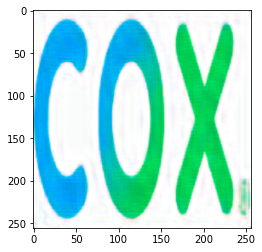

In [10]:
imshow(pred[0].reshape(SIZE,SIZE,3))